In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *

In [41]:
# read chromosomes
initial_acc = 0.9603128433227539

In [42]:
# mutated chromosomes
chromosomes = None
with open('chromosomes/new_cromosomes_mutated.json') as f:
    chromosomes = json.load(f)

In [43]:
for key, value in chromosomes.items():
    chromosomes[key].append(chromosomes[key][0].count(0))
    chromosomes[key].append(chromosomes[key][0].count(1))
    chromosomes[key][1] = chromosomes[key][1]*100

In [44]:
# sort based on number of 0s
chromosomes = {k: v for k, v in sorted(chromosomes.items(), key=lambda item: (item[1][2]), reverse=True)}

In [45]:
len(chromosomes['1'][0])

256

In [46]:
for key, value in chromosomes.items():
    print(key, value[1], value[2], value[3])

57 94.56382038091498 125 131
40 95.08414407590294 118 138
60 95.426946219312 118 138
43 94.9751052741246 115 141
70 94.23846000242321 113 143
0 95.94251388190264 111 145
10 95.57951300850497 111 145
13 95.55322598348445 110 146
14 95.52484320723043 110 146
18 95.44922937427502 110 146
78 95.13525749315521 110 146
12 95.56348678685315 109 147
25 95.33280528743246 109 147
27 95.29811301496892 109 147
33 95.84295942252328 109 147
68 95.0207472373861 109 147
74 94.4204553051653 108 148
58 95.07941555163603 107 149
67 95.55409380227778 107 149
21 95.38959732721082 106 150
34 95.19965085475752 106 150
62 94.22666584682851 106 150
65 94.50633674376068 106 150
9 95.58710910532612 105 151
31 95.24381922860591 105 151
35 95.17304555249785 105 151
56 95.0921151419875 105 151
75 94.99654531462221 105 151
3 95.81287592888302 104 152
8 95.62021275046153 104 152
23 95.54110377863194 104 152
63 94.71397551256551 104 152
71 94.36100306892554 104 152
51 94.82081161382499 103 153
54 95.29751827546309 103

In [47]:
original_model = keras.models.load_model('models/base_model.h5')

In [49]:
original_model.count_params()

204929

In [12]:
import fitness as fit

In [53]:
from test_train_data import x_train, y_train, x_test, y_test

In [54]:
# evaluate
print(original_model.evaluate(x_test, y_test, verbose=2))
print(original_model.evaluate(x_train, y_train, verbose=2))

2023-03-09 18:33:24.876877: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8700


108/108 - 1s - loss: 0.0494 - accuracy: 0.9835 - precision: 0.9740 - 1s/epoch - 12ms/step
[0.04939253628253937, 0.9834878444671631, 0.9739524126052856]
324/324 - 1s - loss: 0.0532 - accuracy: 0.9846 - precision: 0.9812 - 1s/epoch - 4ms/step
[0.05324982479214668, 0.9846465587615967, 0.9812241792678833]


In [56]:
import time
start_time = time.time()
predictions = original_model.predict(x_test)
inference_time = time.time() - start_time
inference_time

108/108 [==============================] - 0s 3ms/step


1.3925752639770508

In [16]:
# precision, recall, f1-score

# precision
y_pred = original_model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='macro')
print('Recall: %f' % recall)

# f1-score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro')
print('F1 score: %f' % f1)

# jaccard score
from sklearn.metrics import jaccard_score
jaccard = jaccard_score(y_test, y_pred, average='macro')
print('Jaccard score: %f' % jaccard)

# cohens kappa
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohens kappa: %f' % kappa)

# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

108/108 [==============================] - 0s 3ms/step
Recall: 0.500000
F1 score: 0.424187
Jaccard score: 0.368337
Cohens kappa: 0.000000
[[2543    0]
 [ 909    0]]


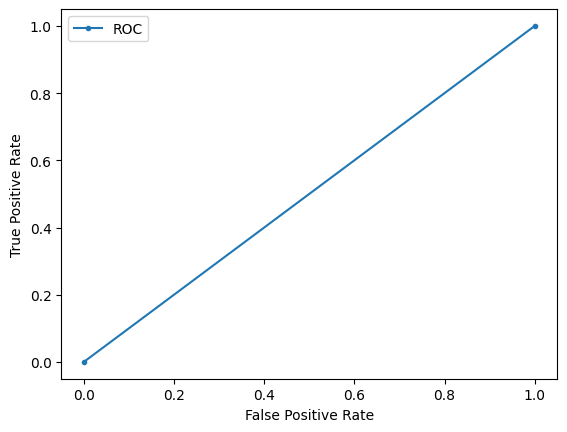

In [17]:

# roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.', label='ROC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [18]:
original_model.predict(x_test).shape

108/108 [==============================] - 0s 3ms/step


(3452, 1)

In [20]:
num_params = original_model.count_params()
num_flops = original_model.count_params() * x_train.shape[0] * 10
num_mflops = num_flops / 1e6
print('Number of MFLOPS:', num_mflops)

Number of MFLOPS: 21222.44724


In [13]:
import generate_sub_model as gsm

In [14]:
print(chromosomes['57'][1:])

[94.56382038091498, 125, 131]


In [50]:
new_model = gsm.genSubModel(chromosomes['57'][0], original_model)

In [51]:
new_model.count_params()

62472

In [52]:
total_nodes = 0
for layer in new_model.layers:
    total_nodes += layer.count_params()
print(total_nodes)

62472


In [24]:
import fitness as fit

In [25]:
from test_train_data import x_train, y_train, x_test, y_test

In [26]:
fit.getFitness(new_model, epochs=10, verbose=1)


Epoch 1/10


2023-03-09 16:29:07.591138: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f62dc34f150 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-09 16:29:07.591226: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Tesla V100-SXM2-16GB, Compute Capability 7.0
2023-03-09 16:29:07.599372: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-09 16:29:07.732691: I tensorflow/compiler/jit/xla_compilation_cache.cc:480] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


324/324 [==============================] - 6s 10ms/step - loss: 0.2101 - accuracy: 0.9191 - precision: 0.8655 - val_loss: 0.1521 - val_accuracy: 0.9499 - val_precision: 0.8907
Epoch 2/10
324/324 [==============================] - 3s 9ms/step - loss: 0.1196 - accuracy: 0.9572 - precision: 0.9193 - val_loss: 0.1585 - val_accuracy: 0.9435 - val_precision: 0.9648
Epoch 3/10
324/324 [==============================] - 3s 8ms/step - loss: 0.0882 - accuracy: 0.9681 - precision: 0.9390 - val_loss: 0.1291 - val_accuracy: 0.9589 - val_precision: 0.9444
Epoch 4/10
324/324 [==============================] - 3s 8ms/step - loss: 0.0686 - accuracy: 0.9743 - precision: 0.9495 - val_loss: 0.1227 - val_accuracy: 0.9632 - val_precision: 0.9589
Epoch 5/10
324/324 [==============================] - 3s 8ms/step - loss: 0.0565 - accuracy: 0.9788 - precision: 0.9580 - val_loss: 0.1257 - val_accuracy: 0.9618 - val_precision: 0.9544
Epoch 6/10
324/324 [==============================] - 3s 8ms/step - loss: 0.0450

0.9578727877626492

In [27]:

# evaluate
print(new_model.evaluate(x_test, y_test, verbose=2))
print(new_model.evaluate(x_train, y_train, verbose=2))

108/108 - 0s - loss: 0.1184 - accuracy: 0.9690 - precision: 0.9407 - 419ms/epoch - 4ms/step
[0.11844383925199509, 0.9690034985542297, 0.9406593441963196]
324/324 - 1s - loss: 0.0120 - accuracy: 0.9971 - precision: 0.9926 - 1s/epoch - 4ms/step
[0.011957664042711258, 0.9971031546592712, 0.9926389455795288]


In [57]:
import time
start_time = time.time()
predictions = new_model.predict(x_test)
inference_time = time.time() - start_time
inference_time

108/108 [==============================] - 0s 3ms/step


1.311220407485962

In [27]:
num_params = new_model.count_params()
num_flops = new_model.count_params() * x_train.shape[0] * 10
num_mflops = num_flops / 1e6
print('Number of MFLOPS:', num_mflops)

Number of MFLOPS: 6469.60032


In [28]:
# save model
new_model.save('models/new_model_best_compression.h5')

In [34]:
new_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'Precision'])

new_model.fit(x_train, y_train, epochs=30, verbose=1,validation_data=(x_test, y_test))

Epoch 1/30
324/324 [==============================] - 6s 11ms/step - loss: 0.1970 - accuracy: 0.9223 - precision: 0.8634 - val_loss: 0.1287 - val_accuracy: 0.9516 - val_precision: 0.8932
Epoch 2/30
324/324 [==============================] - 3s 8ms/step - loss: 0.1095 - accuracy: 0.9592 - precision: 0.9204 - val_loss: 0.0974 - val_accuracy: 0.9635 - val_precision: 0.9306
Epoch 3/30
324/324 [==============================] - 3s 8ms/step - loss: 0.0818 - accuracy: 0.9700 - precision: 0.9412 - val_loss: 0.0998 - val_accuracy: 0.9623 - val_precision: 0.9537
Epoch 4/30
324/324 [==============================] - 3s 8ms/step - loss: 0.0597 - accuracy: 0.9790 - precision: 0.9590 - val_loss: 0.0915 - val_accuracy: 0.9687 - val_precision: 0.9384
Epoch 5/30
324/324 [==============================] - 3s 8ms/step - loss: 0.0474 - accuracy: 0.9822 - precision: 0.9650 - val_loss: 0.0891 - val_accuracy: 0.9696 - val_precision: 0.9367
Epoch 6/30
324/324 [==============================] - 3s 8ms/step - l

Text(0, 0.5, 'Accuracy')

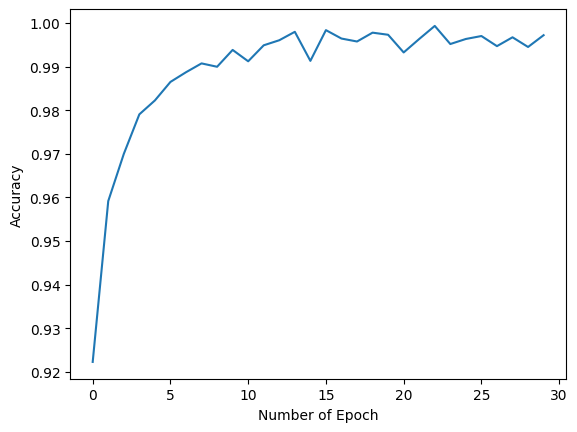

In [47]:
# draw graph of accuracy in each epoch
plt.plot(new_model.history.history['accuracy'])
plt.xlabel("Number of Epoch")
plt.ylabel("Accuracy")

In [9]:
import copy

In [18]:
for key, value in chromosomes.items():
    to_remove = {}
    to_remove_as_list = copy.deepcopy(value[0])
    for i, layer in enumerate(new_model.layers):
        if(i != 0 and i != len(new_model.layers) - 1):
            if(isinstance(layer, keras.layers.Conv2D)):
                ls = to_remove_as_list[:int(layer.filters)]
                to_remove_as_list = to_remove_as_list[int(layer.filters):]
                zero_idx = ls.count(0)
                to_remove[i] = zero_idx
            elif (isinstance(layer, keras.layers.Dense)):
                ls = to_remove_as_list[:int(layer.units)]
                to_remove_as_list = to_remove_as_list[int(layer.units):]
                zero_idx =  ls.count(0)
                to_remove[i] = zero_idx
    value.append(to_remove)

In [19]:
print(chromosomes['57'][1:])

[94.56382038091498, 125, 131, {2: 10, 4: 16, 6: 7, 9: 34}]


In [20]:
# sort chromosomes based on number of 0s and accuracy
chromosomes = {k: v for k, v in sorted(chromosomes.items(), key=lambda item: (item[1][3], item[1][2]), reverse=True)}

In [22]:
# get first 10 chromosomes sorted by accuracy
chromosomes_10 = {k: v for k, v in sorted(chromosomes.items(), key=lambda item: (item[1][1]), reverse=True)[:10]}

In [23]:
for key, value in chromosomes_10.items():
    print(value[1])

96.08708550999644
95.94251388190264
95.89811136034884
95.8737893318118
95.8462897326631
95.84295942252328
95.81797206734596
95.81287592888302
95.80345378179626
95.79983641010934


In [24]:
n = 10
x = np.arange(n)

In [25]:
accuracy = []
zeroes_l1 = []
zeroes_l2 = []
zeroes_l3 = []
zeroes_l4 = []
for key, value in chromosomes_10.items():
    accuracy.append(value[1])
    zeroes_l1.append(value[4][2])
    zeroes_l2.append(value[4][4])
    zeroes_l3.append(value[4][6])
    zeroes_l4.append(value[4][9])

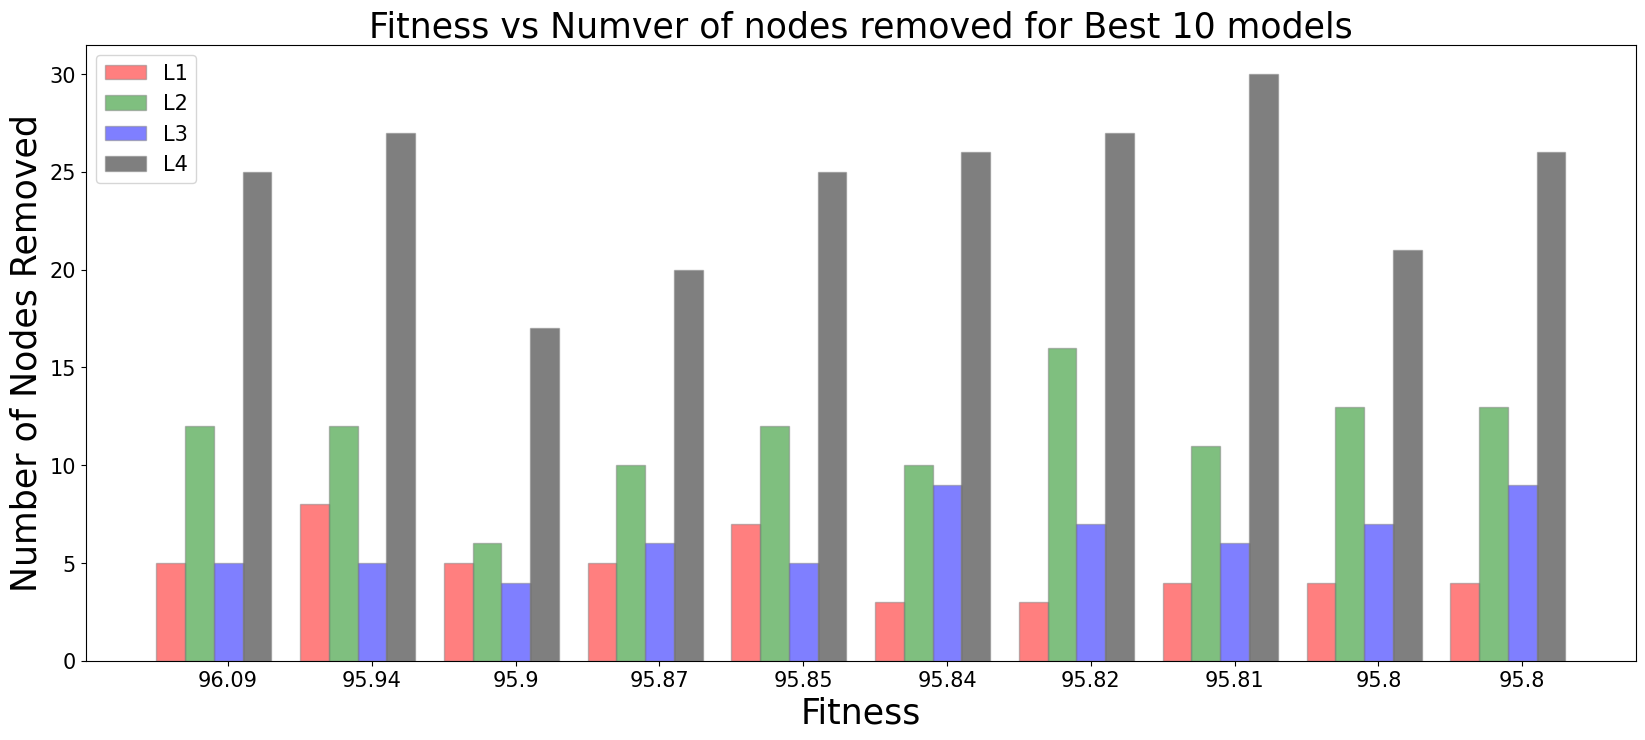

In [38]:
fig = plt.subplots(1,1,figsize =(20, 8))

plt.bar(x, zeroes_l1 , color ='r', width = 0.2,
        edgecolor ='grey', alpha=.5 , label ='L1')

plt.bar(x + 0.2, zeroes_l2 , color ='g', width = 0.2,
        edgecolor ='grey', alpha=.5 , label ='L2')

plt.bar(x+0.4, zeroes_l3 , color ='b', width = 0.2,
        edgecolor ='grey', alpha=.5 , label ='L3')

plt.bar(x+0.6, zeroes_l4 , color ='black', width = 0.2,
        edgecolor ='grey', alpha=.5 , label ='L4')

plt.title("Fitness vs Numver of nodes removed for Best 10 models",fontsize = 25)
plt.xlabel("Fitness",fontsize = 25)
plt.ylabel("Number of Nodes Removed",fontsize = 25)

plt.xticks(x + 0.4, [str(round(float(i),2)) for i in accuracy],fontsize = 15)
plt.yticks(fontsize=15)

plt.legend(fontsize = 15)
plt.show()


In [52]:
models = [
    'originaLNN',
    'CompressedNN',
    'alexnet',
    'KNN',
    'LogisticRegression',
    'RandomForest',
    'resnet',
    'SVM',
]

accuracy = [
    98.26806777000427,
    96.93962721824646,
    74.9,
    88.03592120509849,
    84.50173812282734,
    91.33835457705678,
    83.4,
    90.58516801853997
]

In [53]:
import seaborn as sns

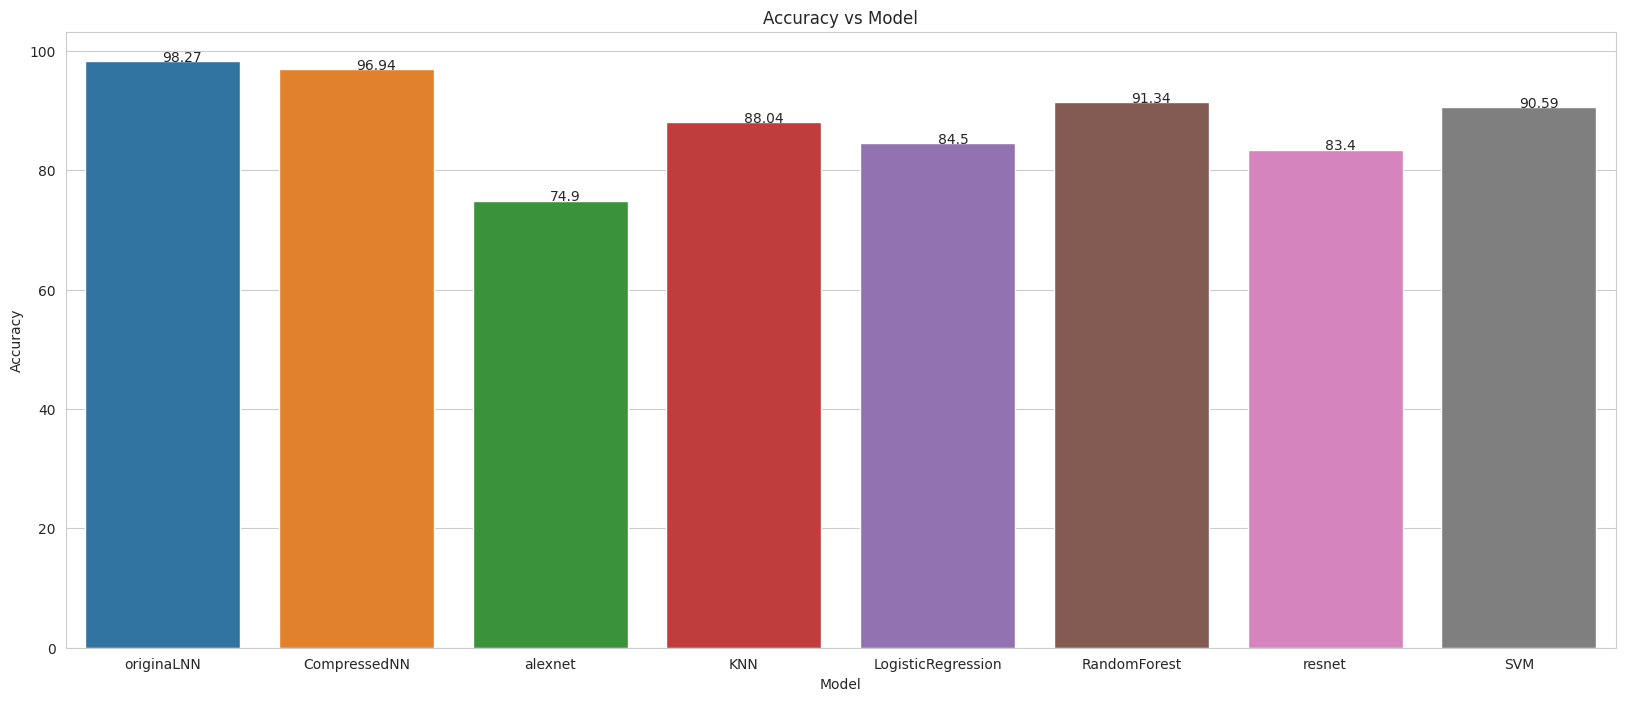

In [54]:
# draw graph of accuracy vs model with labels and title
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.title("Accuracy vs Model")
plt.xlabel("Model")
plt.ylabel("Accuracy")
sns.barplot(x=models, y=accuracy)

# bar labels
for index, value in enumerate(accuracy):
    plt.text(index, value, str(round(value, 2)))

plt.show()


# MFLOPS


In [52]:
num_params = original_model.count_params()
num_flops = original_model.count_params() * x_train.shape[0] * 10
num_mflops = num_flops / 1e6
print('Number of MFLOPS:', num_mflops)

Number of MFLOPS: 21222.44724


In [53]:
num_params = new_model.count_params()
num_flops = new_model.count_params() * x_train.shape[0] * 10
num_mflops = num_flops / 1e6
print('Number of MFLOPS:', num_mflops)

Number of MFLOPS: 6469.60032


In [54]:
import os

In [55]:
# size of original model
print('Original model size:', os.path.getsize('models/base_model.h5'))


Original model size: 2518152


In [56]:
print('Original model size:', os.path.getsize('models/new_model_best_compression.h5'))


Original model size: 808328


In [57]:
# find amount of compression
print('Compression:', 1 - (os.path.getsize('models/new_model_best_compression.h5') / os.path.getsize('models/base_model.h5')))

Compression: 0.6789995202831283


In [59]:
# find accuracy, precision, recall, f1 score, jaccard index, kappa score, confusion matrix, ROC curve, AUC score, etc.


y_pred = new_model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='macro')
print('Recall: %f' % recall)

# f1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro')
print('F1 score: %f' % f1)

# jaccard index
from sklearn.metrics import jaccard_score
jaccard = jaccard_score(y_test, y_pred, average='macro')
print('Jaccard score: %f' % jaccard)

# kappa score
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohens kappa: %f' % kappa)

# confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

# ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(fpr, tpr, thresholds)

# AUC score
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC=%.3f' % (auc))


108/108 [==============================] - 0s 3ms/step
Recall: 0.500000
F1 score: 0.421872
Jaccard score: 0.364861
Cohens kappa: 0.000000
[[2519    0]
 [ 933    0]]
[0. 1.] [0. 1.] [1 0]
ROC AUC=0.500


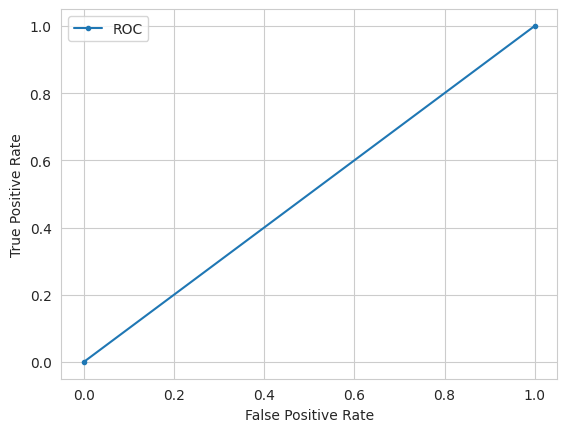

In [60]:

# roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.', label='ROC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()